In [1]:
import os
import math
import time
import random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from dataset import *
from train import *
from test import *

# 数据处理

## 首先进行数据的预处理，读取训练集和测试集后，进行数据精度量化压缩

In [2]:
getdata = GetData(train_path='data/train.csv',test_path='data/testA.csv')

In [3]:
getdata.data_processing()

Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
Memory usage of dataframe is 31.43 MB
Memory usage after optimization is: 7.90 MB
Decreased by 74.9%


## 对训练数据和测试数据进行格式化处理

In [4]:
getdata.convert_data()
print(getdata.train_data.shape)
print(getdata.train_label.shape)
print(getdata.test_data.shape)

(100000, 205)
(100000,)
(20000, 205)


## 对数据进行探索

### 基本信息

In [5]:
getdata.train_data.head()

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_195,s_196,s_197,s_198,s_199,s_200,s_201,s_202,s_203,s_204
0,0.991211,0.943359,0.764648,0.618652,0.379639,0.190796,0.040222,0.026001,0.031708,0.065552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.971680,0.929199,0.572754,0.178467,0.122986,0.132324,0.094421,0.089600,0.030487,0.040497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.958984,0.701172,0.231812,0.000000,0.080688,0.128418,0.187500,0.280762,0.328369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.975586,0.934082,0.659668,0.249878,0.237061,0.281494,0.249878,0.249878,0.241455,0.230713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.055817,0.261230,0.359863,0.433105,0.453613,0.499023,0.542969,0.616699,0.676758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
getdata.train_data.describe()

,s_0,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_195,s_196,s_197,s_198,s_199,s_200,s_201,s_202,s_203,s_204
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.0,100000.0,100000.0,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.913086,0.694824,0.346436,0.096191,0.129883,0.134521,0.112183,0.101013,0.100586,0.105347,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.984375,0.859375,0.548828,0.282471,0.238037,0.245850,0.226562,0.233765,0.235352,0.216919,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,0.933105,0.685547,0.519531,0.431396,0.443115,0.450439,0.432373,0.396484,0.368652,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.983887,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
getdata.train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 205 entries, s_0 to s_204
dtypes: float16(205)
memory usage: 39.1 MB


### 类别信息

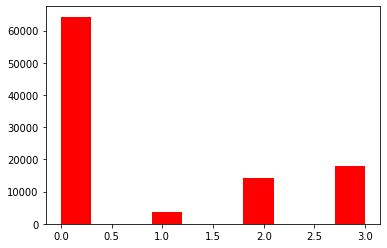

In [8]:
plt.hist(getdata.train['label'], orientation = 'vertical', histtype = 'bar', color = 'red')
plt.show() 

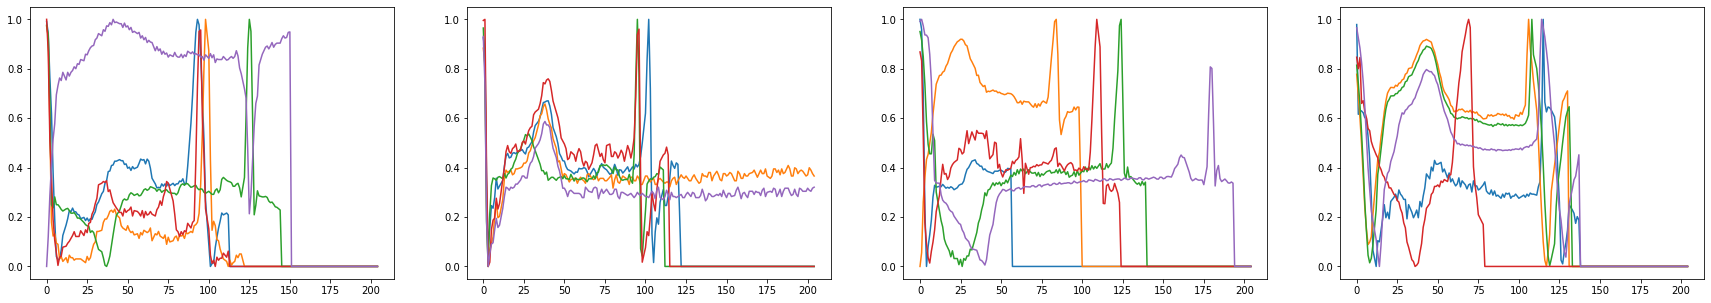

In [9]:
category0 = getdata.train[getdata.train["label"] == 0].values[:, 1:-1]
category1 = getdata.train[getdata.train["label"] == 1].values[:, 1:-1]
category2 = getdata.train[getdata.train["label"] == 2].values[:, 1:-1]
category3 = getdata.train[getdata.train["label"] == 3].values[:, 1:-1]
plt.figure(figsize=(30, 5))
plt.subplot(1, 4, 1)
for i in range(5):
    plt.plot(category0[i])
plt.subplot(1, 4, 2)
for i in range(5):
    plt.plot(category1[i])
plt.subplot(1, 4, 3)
for i in range(5):
    plt.plot(category2[i])
plt.subplot(1, 4, 4)
for i in range(5):
    plt.plot(category3[i])


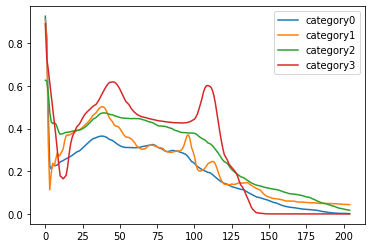

In [10]:
plt.cla()
plt.plot(category0.mean(axis=0), label="category0")
plt.plot(category1.mean(axis=0), label="category1")
plt.plot(category2.mean(axis=0), label="category2")
plt.plot(category3.mean(axis=0), label="category3")
plt.legend()


可以看出，数据集为严重类别不平衡的数据集，同时类别之间的特征点差异较为明显

### 总结

1. 主要的特征数据为 1 维信号，并且被归一化至 0～1 之间，无需进行脏数据处理，总长度均为 205 (205 个时间节点/心跳节拍)

2. 除波形数据外，没有任何辅助或先验信息可以利用

3. 波形数据均已被量化为 float16 类型的数值型特征，且没有类别型特征需要考虑

4. 没有缺失值，无需填充，非常理想

5. 非表格数据更适合用神经网络来处理

6. 具有较为严重的类别不平衡问题

# 训练模型

训练一个神经网络（DenseNet）

![](img/densenet.png)

In [11]:
train = Train(
    train_path="data/train.csv",
    test_path="data/testA.csv",
    result_path="result",
    num_classes=4,
    growth_rate=32,
    block_config=[6, 12, 64, 48],
    num_init_features=64,
    bn_size=4,
    drop_rate=0,
    num_epochs=50,
    batch_size=250,
    lr=1e-1,
    weight_decay=1e-4,
    device="cuda:2",
    resume=False,
)
train.setup_seed(2021)
train.dataload()
train.build_model()
train.define_loss()
train.define_optim()
train.train()
print("training finished!")


Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
Memory usage of dataframe is 31.43 MB
Memory usage after optimization is: 7.90 MB
Decreased by 74.9%
training started!


/home/sgq/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


[447.276370s] Epoch 1. Train Loss: 0.245743, Train Acc: 0.936424, Valid Loss: 0.094726, Valid Acc: 0.970800, 
[428.009044s] Epoch 2. Train Loss: 0.073694, Train Acc: 0.977729, Valid Loss: 0.061930, Valid Acc: 0.980867, 
[440.697432s] Epoch 3. Train Loss: 0.051553, Train Acc: 0.983812, Valid Loss: 0.049921, Valid Acc: 0.985800, 
[449.883543s] Epoch 4. Train Loss: 0.036565, Train Acc: 0.988271, Valid Loss: 0.044305, Valid Acc: 0.986067, 
[434.105678s] Epoch 5. Train Loss: 0.027860, Train Acc: 0.990706, Valid Loss: 0.044554, Valid Acc: 0.987333, 
[438.812436s] Epoch 6. Train Loss: 0.018004, Train Acc: 0.994200, Valid Loss: 0.038044, Valid Acc: 0.988333, 
[435.967622s] Epoch 7. Train Loss: 0.012813, Train Acc: 0.995953, Valid Loss: 0.038612, Valid Acc: 0.988200, 
[438.566653s] Epoch 8. Train Loss: 0.008361, Train Acc: 0.997506, Valid Loss: 0.037571, Valid Acc: 0.989667, 
[429.278359s] Epoch 9. Train Loss: 0.004151, Train Acc: 0.999071, Valid Loss: 0.036206, Valid Acc: 0.990867, 
[434.86484

# 测试模型

将得到的模型对testA进行预测，并且提交答案

In [11]:
test = Test(
    train_path="data/train.csv",
    test_path="data/testA.csv",
    result_path="result",
    num_classes=4,
    batch_size=200,
    block_config=[6, 12, 64, 48],
    device="cuda:2",
)
test.setup_seed(2022)
test.dataload()
test.build_model()
test.test()

Memory usage of dataframe is 157.93 MB
Memory usage after optimization is: 39.67 MB
Decreased by 74.9%
Memory usage of dataframe is 31.43 MB
Memory usage after optimization is: 7.90 MB
Decreased by 74.9%
load success!


/home/sgq/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


       id  label_0  label_1  label_2  label_3
0  100000      1.0      0.0      0.0      0.0
1  100001      0.0      0.0      1.0      0.0
2  100002      0.0      0.0      0.0      1.0
3  100003      1.0      0.0      0.0      0.0
4  100004      1.0      0.0      0.0      0.0
